In [13]:
## Import modules

from linetools.spectra import io as lsio
from linetools.spectra.xspectrum1d import XSpectrum1D
from linetools.spectralline import AbsLine, SpectralLine

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import constants as const
from astropy import units as u
from astropy.table import Table, join, vstack, hstack, Column

In [2]:
## Define constants

c = const.c.to('km/s').value # Speed of light

In [19]:
# Load table of COS-SAGA QSOs
QSO_table = Table.read('tables/COSSAGA-QSOs_HB.txt', format='ascii.commented_header')
QSO_table

idx,sightline,QSO_name,NAID,host_helio_vel,host_z,b_host,host_distance,RA_QSO,DEC_QSO,z_QSO,simbad_name
int64,str11,str23,int64,float64,float64,float64,float64,float64,float64,float64,str23
0,TON1129,TON1129,85746,1457.0,0.00486,209.222285927,25.004747,149.0967254638672,32.60601806640625,0.52572,TON1129
1,J0958+3224,FBQSJ095820.9+322402,85746,1457.0,0.00486,13.4803426516,25.004747,149.58726501464844,32.4006233215332,0.53,FBQSJ0958+3224
2,J0959+3203,SDSSJ095914.85+320357.2,85746,1457.0,0.00486,157.119171001,25.004747,149.81187438964844,32.06591033935547,0.56432,SDSSJ095914.85+320357.2
3,J1202-0129,2MASXJ12022678-0129155,140594,1461.8,0.00487,260.98587288,23.120869,180.6114959716797,-1.487576961517334,0.1508,2MASXJ12022678-0129155
4,J1202+0225,SDSSJ120233.08+022559.7,13927,1967.7,0.00656,235.973508037,0.0,180.6378631591797,2.4332659244537354,0.27216,SDSSJ120233.08+022559.7
5,SBS1421+511,SBS1421+511,144953,2221.0,0.0074,268.169740606,34.035793,215.80909729003906,50.927024841308594,0.27585,ICRFJ142314.1+505537
6,J1429+0321,SDSSJ142940.73+032125.8,165082,1657.4,0.00552,53.8712889489,24.785791,217.41976928710938,3.3571879863739014,0.253,SDSSJ142940.73+032125.8
7,J1431+0301,SDSSJ143145.99+030143.8,165082,1657.4,0.00552,244.117128625,24.785791,217.94163513183594,3.028848886489868,0.34055,SDSSJ143145.99+030143.8
8,J1451+5914,2MASXJ14515156+5914001,165707,2148.21,0.00716,155.099676124,33.376366,222.96473693847656,59.23335647583008,0.29731,2MASXJ14515156+5914001


In [101]:
# # Create a Table for saving the sensitivity limits
# sens_limits = Table()
# sens_limits['QSO'] = QSO_table['QSO_name']

# ## Add columns for sensitivity limits
# temp = np.array([np.nan]*len(QSO_table))
# sens_limits['Nlim_SiII'],sens_limits['Nlim_SiIV'],sens_limits['Nlim_CIV'],sens_limits['Nlim_SII'],sens_limits['Nlim_FeII'],sens_limits['Nlim_NI'] = temp, temp, temp, temp, temp, temp

# ## Add columns for sensitivity limit window
# temp = np.array([[np.nan,np.nan]]*len(QSO_table), dtype='float')
# sens_limits['window_SiII'],sens_limits['window_SiIV'],sens_limits['window_CIV'],sens_limits['window_SII'],sens_limits['window_FeII'],sens_limits['window_NI'] = temp, temp, temp, temp, temp, temp

## Read in table
sens_limits = Table.read('tables/COS-SAGA_sensitivity_limits.txt', format='ascii.commented_header')
sens_limits

QSO,Nlim_SiII,Nlim_SiIV,Nlim_CIV,Nlim_SII,Nlim_FeII,Nlim_NI,window_SiII,window_SiIV,window_CIV,window_SII,window_FeII,window_NI
str23,float64,float64,float64,float64,float64,float64,float64[2],float64[2],float64[2],float64[2],float64[2],float64[2]
TON1129,nan,nan,nan,nan,nan,nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan
FBQSJ095820.9+322402,nan,nan,nan,nan,nan,nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan
SDSSJ095914.85+320357.2,nan,nan,nan,nan,nan,nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan
2MASXJ12022678-0129155,nan,nan,nan,nan,nan,nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan
SDSSJ120233.08+022559.7,nan,nan,nan,nan,nan,nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan
SBS1421+511,nan,nan,nan,nan,nan,nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan
SDSSJ142940.73+032125.8,nan,nan,nan,nan,nan,nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan
SDSSJ143145.99+030143.8,nan,nan,nan,nan,nan,nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan
2MASXJ14515156+5914001,nan,nan,nan,nan,nan,nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan


In [102]:
# Function for reading in the spectrum

def get_spectrum(filename):
    flux_line = fits.getdata(filename, ext=0)
    flux_error = fits.getdata(filename, ext=1)
    wave_data = fits.getdata(filename, ext=2)
    flux_cont = fits.getdata(filename, ext=3)
    return wave_data, flux_line, flux_error, flux_cont

In [690]:
ion = ''

line_wave, ion = 1393.755, 'SiIV' # SiIV 1393 # 0.5280 
# line_wave, ion = 1260.4221, 'SiII' # SiII 1260 # 1.0070 
# line_wave, ion = 1253.811, 'SII' # SII 1253 # 0.01088
# line_wave, ion = 1200.2233, 'NI' # NI 1200  # 0.08620  
# line_wave, ion = 1260.533, 'FeII' # FeII 1260
# line_wave, ion = 1548.2040, 'CIV' # CIV 1548


# Let's say we're interested in our sensitivity limit for the CIV 1548 A line
# line_wave = 1548.2040, 1550.7810

# does have a CII* 1335 line with N~14.25

# line_wave, ion = 1260.533, 'FeII' # FeII 1260

# # line_wave = 1250.584 # SII 1250 # 0.005453 
# line_wave, ion = 1253.811, 'SII' # SII 1253 # 0.01088
# # line_wave = 1259.519 # SII 1259 # 0.01624

# # line_wave = 1199.5496 # NI 1199  # 0.1300   
# line_wave, ion = 1200.2233, 'NI' # NI 1200  # 0.08620  
# # line_wave = 1200.7098 # NI 1200c # 0.04300 

# line_wave, ion = 1260.4221, 'SiII' # SiII 1260 # 1.0070  
# line_wave, ion = 1193.2897, 'SiII' # SiII 1193 # 0.49910 
# # line_wave = 1190.4158 # SiII 1190 # 0.25020 
# # line_wave = 1304.3702 # SiII 1304 # 0.0940  

# line_wave, ion = 1393.755, 'SiIV' # SiIV 1393 # 0.5280 
# line_wave = 1402.770 # SiIV 1402 # 0.2620 


### Sensitivity limit calculation

In [692]:
## Load an example spectrum
ind = 0

# specfile = '/Users/hannahbish/Dropbox/QuaStar/Data/HST/Analysis/kinematics/Quasars/reduced-spectra/hlsp_cos-gal_hst_cos_1h-2129-624_g130m-g160m_v1_fullspec_clean_ltnorm.fits'
# specfile = './hlsp_cos-gal_hst_cos_1h-2129-624_g130m-g160m_v1_fullspec_clean_ltnorm.fits'
# specfile = '/Users/hbish/Dropbox/COS-SAGA/data/plot_spec/Q0959+3203_ltnorm.fits'

specfile = '/Users/hbish/Dropbox/COS-SAGA/HB/data/all_spectra_final/'+QSO_table[ind]['QSO_name']+'_ltnorm.fits'

waves, flux, flux_err, cont = get_spectrum(specfile) # Get wavelength, flux, flux error, and continuum flux for the spectrum
normflux, normflux_err = flux/cont, flux_err/cont # Calculate continuum-normalized flux

# Calculate velocities corresponding to the wavelength array

# redshift = 0.0053370255232 # Redshift of absorber system
redshift = QSO_table[ind]['host_z']
waves_rest = waves / (1+redshift)
vels = ((waves_rest-line_wave)/line_wave) * c # delta_lambda/lambda = v/c

First, identify a featureless region of the spectrum near the line you are measuring. 

Then measure the column density of this noisy region (which theoretically should be 0), and the error on that column density measurement gives us the sensitivity limit.

In [693]:
# Choose the width of the velocity window you'll use to measure noise (Jess may have thoughts on what this should be in your case)
window_width = 100 # km/s

Text(0.5, 1.0, 'TON1129')

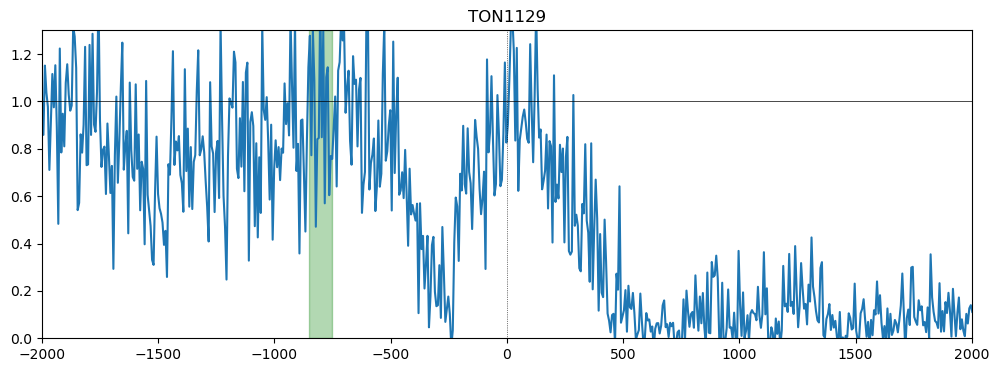

In [695]:
## Examine the spectrum by eye near the line of interest to find a featureless region where you want to measure noise

# Choose where this measurement window is centered. 
# Change this variable to move the window around and identify a region with pure noise and no absorption features
centervel = -800

# Save min and max velocity limits of the window
leftlim = centervel-window_width/2
rightlim = centervel+window_width/2

# Plot spectrum
plt.figure(figsize=(12,4))

plt.plot(vels, normflux)
plt.ylim(0,1.3)
plt.xlim(-2000,2000)

# Plot velocity window
plt.axvspan(leftlim,rightlim,alpha = 0.3,color='g')

# Plot guidelines
plt.axhline(1, lw=0.5, c='k')
plt.axvline(0, lw=0.5, c='k', ls=':')

plt.title(QSO_table[ind]['QSO_name'])

In [681]:
## Calculate column density of the noisy region

abslin = None
if ion == 'SiIV':
    abslin = AbsLine('SiIV 1393')
elif ion == 'SiII':
    abslin = AbsLine('SiII 1260')
elif ion == 'SII':
    abslin = AbsLine('SII 1253')
elif ion == 'FeII':
    abslin = AbsLine('FeII 1260')
elif ion == 'NI':
    abslin = AbsLine('NI 1200')
elif ion == 'CIV':
    abslin = AbsLine('CIV 1548')

abslin.analy['spec'] = XSpectrum1D.from_tuple((waves_rest, normflux, normflux_err))  # Set spectrum
abslin.limits.set([leftlim,rightlim]*u.km/u.s) # Set analysis range
abslin.measure_aodm() # Measure column density (observer frame)

N = abslin.attrib['N']         # Column density measurement for featureless region (not used)
N_err = abslin.attrib['sig_N'] # Column density 1-sigma error for featureless region

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


In [682]:
# The error on the column density for a region with no absorption gives the sensitivity limit, since any gas absorption at this column density or lower will be indistinguishable from noise

# Note that the error given is a 1-sigma error. If you want to report 2-sigma error you can simply multiply the column density error by 2
sigma = 2.

print("1-sigma sensitivity limit: logN <", np.round(np.log10(np.abs(N_err.value)),2)) # In cm^-2
print("2-sigma sensitivity limit: logN <", np.round(np.log10(np.abs(sigma * N_err.value)),2)) # In cm^-2

1-sigma sensitivity limit: logN < 13.78
2-sigma sensitivity limit: logN < 14.08


In [683]:
sens_limits[ind]['Nlim_'+ion] = np.round(np.log10(np.abs(N_err.value)),2)
sens_limits[ind]['window_'+ion] = [leftlim, rightlim]

In [684]:
sens_limits

QSO,Nlim_SiII,Nlim_SiIV,Nlim_CIV,Nlim_SII,Nlim_FeII,Nlim_NI,window_SiII,window_SiIV,window_CIV,window_SII,window_FeII,window_NI
str23,float64,float64,float64,float64,float64,float64,float64[2],float64[2],float64[2],float64[2],float64[2],float64[2]
TON1129,12.12,12.63,nan,14.21,13.81,13.23,-350.0 .. -250.0,-850.0 .. -750.0,nan .. nan,450.0 .. 550.0,-350.0 .. -250.0,-350.0 .. -250.0
FBQSJ095820.9+322402,11.98,12.35,nan,14.0,13.65,13.17,-510.0 .. -410.0,-1295.0 .. -1195.0,nan .. nan,-400.0 .. -300.0,-550.0 .. -450.0,-1020.0 .. -920.0
SDSSJ095914.85+320357.2,12.12,nan,nan,14.16,13.8,13.33,-230.0 .. -130.0,nan .. nan,nan .. nan,-930.0 .. -830.0,-250.0 .. -150.0,270.0 .. 370.0
2MASXJ12022678-0129155,11.86,12.12,nan,13.9,13.55,13.08,-600.0 .. -500.0,-1240.0 .. -1140.0,nan .. nan,-1250.0 .. -1150.0,-650.0 .. -550.0,450.0 .. 550.0
SDSSJ120233.08+022559.7,11.93,12.37,nan,13.96,13.62,13.15,-980.0 .. -880.0,-350.0 .. -250.0,nan .. nan,-100.0 .. 0.0,-1030.0 .. -930.0,-50.0 .. 50.0
SBS1421+511,12.38,12.76,nan,14.27,13.94,13.5,355.0 .. 455.0,230.0 .. 330.0,nan .. nan,-550.0 .. -450.0,-50.0 .. 50.0,-350.0 .. -250.0
SDSSJ142940.73+032125.8,12.18,12.67,nan,14.22,13.87,13.49,-600.0 .. -500.0,-50.0 .. 50.0,nan .. nan,950.0 .. 1050.0,-650.0 .. -550.0,-350.0 .. -250.0
SDSSJ143145.99+030143.8,nan,nan,nan,nan,nan,nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan,nan .. nan
2MASXJ14515156+5914001,12.07,12.48,nan,14.1,13.73,13.28,-310.0 .. -210.0,-150.0 .. -50.0,nan .. nan,150.0 .. 250.0,-445.0 .. -345.0,0.0 .. 100.0


In [685]:
sens_limits.write('tables/COS-SAGA_sensitivity_limits.ecsv', format='ascii.ecsv', overwrite=True)